In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('pre_processed_dataset.csv')
df.head(3)

,time,quantity_sold_kg,unit_selling_price_rmb/kg,item_name_7 colour pepper,item_name_agaricus bisporus,item_name_aihao,item_name_amaranth,item_name_basil,item_name_bell pepper,item_name_big broccoli,...,item_name_yuxingcao,item_name_zhijiang red bolt,item_name_zhimaxiancai,item_name_zhuyecai,category_name_aquatic,category_name_cabbage,category_name_capsicum,category_name_flower,category_name_mushroom,category_name_solanum
0,9,0.304000,21.183333,True,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
1,10,0.274889,21.662222,True,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
2,11,0.279220,21.902439,True,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


In [4]:
df.shape

(1263, 132)

In [5]:
# Find the clusters using elbow method
from sklearn.cluster import KMeans
k_values = range(1,25)
wcss_error = []
for k in k_values :
    model = KMeans(n_clusters= k)
    model.fit(df)
    wcss_error.append(model.inertia_)

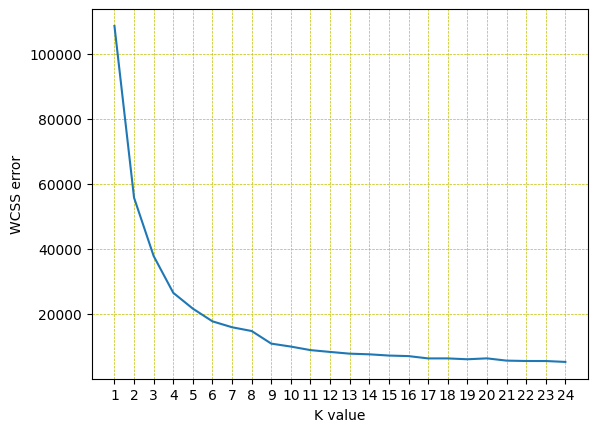

In [6]:
plt.plot(k_values, wcss_error)
plt.xlabel('K value')
plt.ylabel('WCSS error') 
plt.xticks(k_values)
plt.grid(True, linewidth = 0.5, color = 'y', linestyle = '--')

In [7]:
from sklearn.cluster import KMeans

In [8]:
# Apply K-Means algorithm
kmeans = KMeans(n_clusters=6, random_state=42)
pred = kmeans.fit_predict(df)
pred

array([5, 5, 5, ..., 2, 2, 2], dtype=int32)

In [9]:
df_trained = df
df_trained['cluster'] = pred
df.head(3)

,time,quantity_sold_kg,unit_selling_price_rmb/kg,item_name_7 colour pepper,item_name_agaricus bisporus,item_name_aihao,item_name_amaranth,item_name_basil,item_name_bell pepper,item_name_big broccoli,...,item_name_zhijiang red bolt,item_name_zhimaxiancai,item_name_zhuyecai,category_name_aquatic,category_name_cabbage,category_name_capsicum,category_name_flower,category_name_mushroom,category_name_solanum,cluster
0,9,0.304000,21.183333,True,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,5
1,10,0.274889,21.662222,True,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,5
2,11,0.279220,21.902439,True,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,5


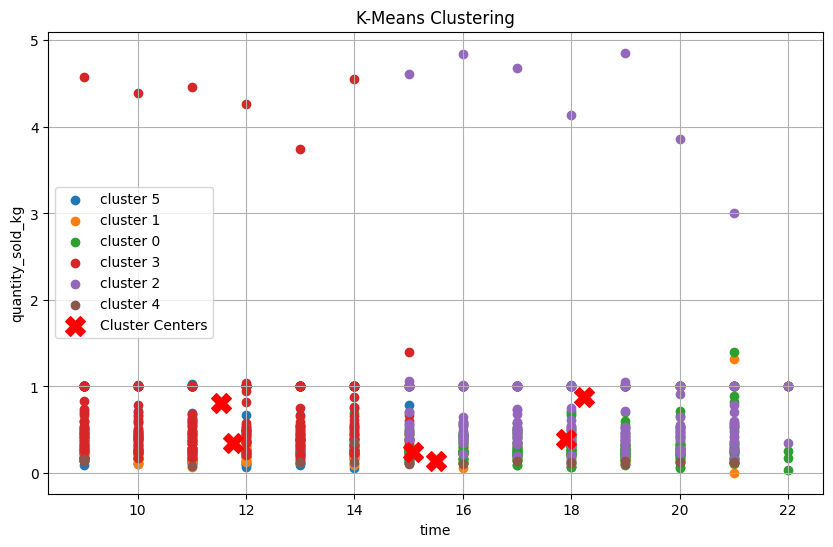

In [10]:
# Scatter plot for visualization
plt.figure(figsize=(10, 6))

# Plot each cluster
for cluster_label in df_trained['cluster'].unique():
    cluster_data = df_trained[df_trained['cluster'] == cluster_label]
    plt.scatter(cluster_data['time'], cluster_data['quantity_sold_kg'], label=f'cluster {cluster_label}')

# Plot cluster centers
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='X', s=200, c='red', label='Cluster Centers')

# Add labels and legend
plt.xlabel('time')
plt.ylabel('quantity_sold_kg')
plt.title('K-Means Clustering')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

In [ ]:
col = pd.DataFrame(df.columns)
col.head(3)

In [ ]:
col.to_csv('column_names', index=False)

In [ ]:
# save the model
import pickle
with open('TimeBasedAnalysis.pickle', 'wb') as file:
    pickle.dump(kmeans, file)

In [ ]:
df_trained['cluster'].value_counts()